# Interpolate values of one grid into another one

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from geotree import gkdtree
import numpy as np

In [3]:
# instantiate gkdtree
mykdtree = gkdtree()

## Define the first set of points

In [4]:
# Define the first set of points
npoints = 100
lons = np.random.randint(-180, 180, npoints)
lats = np.random.randint(-90, 90, npoints)
depths = np.zeros(npoints)

# some random values (for each point)
vals = np.zeros(npoints)
vals[:(npoints//2)] = 0
vals[(npoints//2):] = 1
# random:
# mu = 0
# sigma = 1
# vals = sigma*np.random.randn(npoints) + mu

In [5]:
# Add lons/lats/depths of the first set of points
mykdtree.add_lonlatdep(lons=lons, 
                       lats=lats, 
                       depths=depths)

## Define queries

In [6]:
# Define queries
q_npoints = 10000
q_lons = np.random.randint(-180, 180, q_npoints)
q_lats = np.random.randint(-90, 90, q_npoints)
q_depths = np.zeros(q_npoints)

In [7]:
# Add lons/lats/depths of queries
mykdtree.add_lonlatdep_query(lons=q_lons, 
                             lats=q_lats, 
                             depths=q_depths)

## Add values (for the first set of points)

In [8]:
# Add values, note: size of vals should be 
# the same as lons (first set of points)
mykdtree.add_vals(vals)

## Interpolate

In [18]:
mykdtree.interpolate(num_neighs=10)

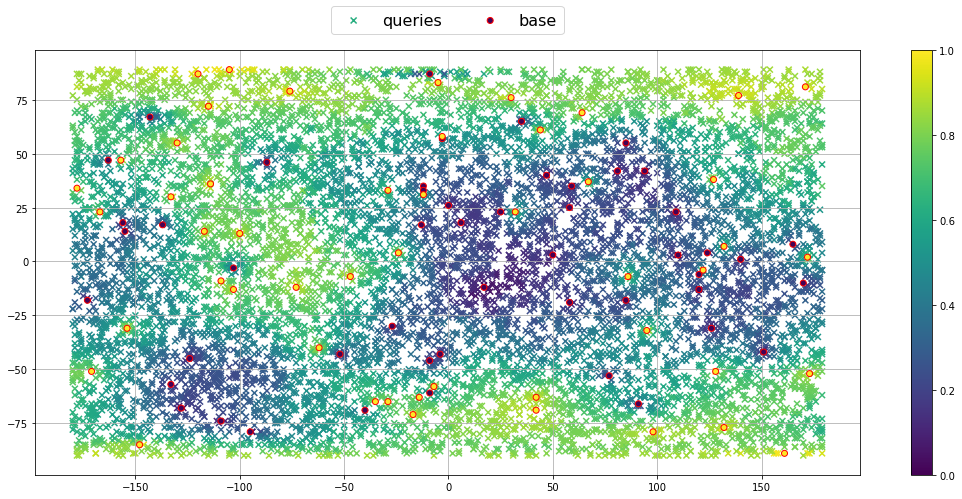

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.scatter(q_lons, q_lats, 
            c=mykdtree.interp_vals, 
            marker="x", 
            vmin=min(vals), vmax=max(vals),
            label="queries")

plt.scatter(lons, lats,
            c=vals, 
            marker="o",
            vmin=min(vals), vmax=max(vals), edgecolors="r",
            label="base",
            zorder=100)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), 
           loc="center", ncol=2, 
           fontsize=16,
           borderaxespad=0.)

plt.colorbar()
plt.grid()
plt.tight_layout()
plt.savefig("./interp_10.png")